### To do
- http://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf

# Explanation 1
### Self-information
#### Requirements
We want to measure information. If we think about it, information is similar to surprise. [Link to appendix] So, let's define a function $I$ that tells us how informative is that an event happened. We have three requirements

1) If we are 100% that an event will happen, then we have 0 surprise. Formally, if P(E = e) = 1 then I(E = e) = 0. 

2) The more sure we are an event won't happen, the more it surprsies when it happens. If we are 100% sure that the event won't happen, the event will surprise us infinitely. Formally, when p(E = e) tends to 0, then I(E = e) tends to infinity. 

3) Finally, the information of two independent events happening at the same time should be the same as the  information of each event happening separately. For instance, take a tossing coin and a dice. What we want is:

I(coin = heads) + I(dice = 1) = I(coin = heads and dice = 1)

This means that the information of the coin coming up heads plus the information of the dice coming up 1 should be equal to the information of both the coin coming up heads and the dice coming up 1.

#### Self-information function
Taking these three requirements into account, let's think of a function $f$ that takes how probable is an event and tells you how informative it is. For the third requirement we need $f(1/2) + f(1/6) = f(1/2 * 1/6).$

The following functions does the job $f(x) = K log(x)$ (for any real K and any base for the logarithm.) 

This function works for the third requirement because $K log(a * b) = K log(a) + K log(b)$. Also, it fulfills the first requirement, because $log(1) = 0$

Now, we want $\lim_{x\to 0} log(x)=\infty.$ For every positive K, as x is between 0 and 1, $log(x) < 0.$ We can discard every positive value for K, because we want positive information for every event with probability smaller than 1. Now, every negative value for K will work. For simplicity, we can take $K = -1$ and define the self-information as

$$I(e) = -log(P(e))$$



Question: are there any other functions besides the logarithm with that fulfills the property $f(a) + f(b) = f(a * b).$? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def info(x):
    #We use base 2 log to have nicer calculations
    return -np.log2(x)

print (f'I(coin = heads) = {info(1/2)}')
print (f'I(dice = 1) = {info(1/6)}')
print (f'I(coin = heads and dice = 1) = {info((1/2) * (1/6))}')

I(coin = heads) = 1.0
I(dice = 1) = 2.584962500721156
I(coin = heads and dice = 1) = 3.584962500721156


### Entropy
#### Interesting worlds
Now that we know how the information of an event relates to its probability of happening, it's time to talk about a set of events. Imagine you have a set $\Omega$ of possible outcomes, each with a probability attached. For instance, with the tossing coin we have $\Omega = \{heads, tails\}.$ With regards to the probabilities, consider the case where we have an unbalanced coin. Thus, $P(heads) = r$ and $P(tails) = 1 - r$ with $r$ between 0 and 1. We want a measure of how interesting each world is. For instance, a world where the coin always comes up heads is pretty boring. We are certain of what's going to happen before it happens. But if the coin is normal, that is, if the coin comes up heads and tails equally likely, then it's interesting. 

Also if we observe a world where ten events can happen equally likely, it will be much more interesting than observing a world with only one event. 

Note that a world is "more interesting" than the other if, for a given event that happened at time t, we were, at time t-1, less certain of it happening. (Thus, more interesting <=> less certain) Now, the less certain we are about an outcome, the more information we receive when we see the result. (Thus, less certain <=> more informative.) Logically, more interesting <=> more informative. 

#### Formula
Thus, how interesting is a world is the same as the expected information received by observing what happens in that world. Using formal terms, each world corresponds to a probability distribution $X$, the expected information is  $E[I(X)]$, and our measure of interestingness is a function called entropy denoted $H.$

$$H(X) = E[I(X)]$$

#### Prediction interpretation
We can also think of the entropy in a world with two possible outcomes as how many times I'm wrong if I have to predict the next outcome. In the case where the two possible outcomes are equally likely, then I have no option but to select at random between the two options. But if one outcome is more likely than the other, then I can use that information and always predict the more probable option. In this case, I will be wrong less times. In the extreme case, when one outcome always happens and the other never happens, I will be wrong 0 times. 

#### Analytical interpretation
You can ask, how can it happen that one world can have a smaller expected information than other? After all, in every world we are receiving the same data (namely, that one event happened.) So, how's that? 

We know that 

$$I(e) = -log(P(e)) = log(1 / P(e))$$

That is, the information of the event e is inversely proportional to the log of its probability of happening. 

So, let's say we have a world with a tossing coin. We have 
$$E[I(X)] = P(heads) * I(heads) + P(tails) * I(tails) $$

We can see from this equation that if $P$ and $I$ were inversely proportional (i.e., $I(e) = 1 / P(e)$) then $E[I(X)]$ should be a constant. But the log changes this behavior. To understand why, let's examine the following equation.

Let's define two worlds $a, b$ each world has only two possible states/outcomes $a_1, a_2$ for the world $a$ and  $b_1, b_2$ for $b$.

Now, let's define the probabilities and calculate the information

$$
P(a_1) = 1/3 \quad I(a_1) \approx 1.1 \quad I(a_1) * P(a_1) \approx .36 \\
P(a_2) = 2/3 \quad I(a_2) \approx .41 \quad I(a_2) * P(a_2) \approx .27 \\ 
P(b_1) = 1/2 \quad I(b_1) \approx .69 \quad I(b_1) * P(b_1) \approx .35 \\
P(b_2) = 1/2 \quad I(b_2) \approx .69 \quad I(b_2) * P(b_2) \approx .35 \\
H(a) \approx .36 + .27 = .63 \\
H(b) \approx .35 + .35 = .7 \\
$$

What we note here is that the entropy (expected information) in the world $b$ is more than in the world $a.$ So imagine we start in the world $b$ and we reduce the probability of the first event by $1/6$ and increase the probability of the second event by $1/6.$ In this way, we arrive at world $a.$ What I want to show is that the increment in information in the first event is less than the decrement in information in the second event (it's easy to see how that applies to the above example, for .36 - .35 < .35 - .27)

So what we have is that
$$
(x + y) f(x + y) - x f(x) = -(x + y) log(x + y) - x -log(x) = -log((x + y)^{(x + y)}) - log(x^x) = 
-log((x + y)^{(x + y)} / x^x) \\
x * f(x) - (x - y) * f(x - y) = -log(x^x) -log((x-y)^{(x-y)}) = -log(x^x / (x-y)^{(x-y)})
$$

Now, what's bigger $(x + y)^{(x + y)} / x^x$ or $x^x / (x-y)^{(x-y)}.$ Let's assume
$$
(x + y)^{(x + y)} / x^x > x^x / (x-y)^{(x-y)}
$$

In [15]:
def entropy(distribution):
    return sum([p * -np.log2(p) for p in distribution if p != 0])

In [16]:
entropy([0, 1])

0.0

In [17]:
entropy([.5, .5])

1.0

In [18]:
entropy([.4, .6])

0.97095059445466858

As we said before, the entropy is maximum when all the outcomes are equally likely and decreases when we make an unbalanced distribution.

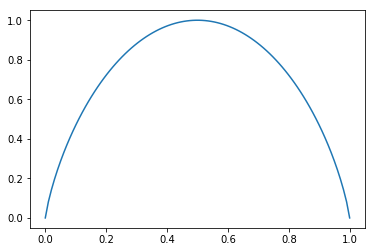

In [20]:
xs = np.linspace(0, 1, 100)
ys = [entropy([x, 1-x]) for x in xs]
plt.plot(xs, ys)

In [21]:
entropy([.25, .25, .25, .25])

2.0

In [22]:
entropy([1/8] * 8)

3.0

As we can see above the maximum entropy increases with the log of the amount of variables we are measuring.
Now, we can define the normalized entropy as how uncertain we are of the outcome in a world relative to it size. 

In [26]:
def normalized_entropy(distribution):
    n = len(distribution)
    max_entropy = [1 / n] * n
    return entropy(distribution) / entropy(max_entropy)

In [31]:
normalized_entropy([.25, .25, .25, .25])

1.0

In [47]:
normalized_entropy([.2, .4, .4])

0.96022971786076117

In [56]:
normalized_entropy([.383, .617])

0.96013330074963765

### Cross-entropy
Now, what happens if I think that the events in a world are governed by some probability distribution $q$, but in reality they are governed by a probability distribution $p$?

My surprisal will be given by my perception of the world (i.e., by the distribution $q$). That is, if I think that an event happens only 1% of the time, I would be very surprised if it happens ten times in a row. That surprise doesn't change if the event in the reality had 10% chance of happening or a 100% chance of happening.

However, the distribution of when each event happens isn't governed by my beliefs but by the reality.

So, we have that a set of events happen with a probability distribution $p$ but the surprise is given by the probability distribution $q.$

Thus, we want a new version of the entropy, one that allows us to use different distributions for the probability of an event and for the surprisal of an event. 

$$H(p, q) = -\sum_{x_i} p(x_i) log(q(x_i)) = \sum_{x_i} p(x_i) log\frac{1}{q(x_i)}$$

Note that the entropy is a special case of the cross-entropy. Formally, $H(p) = H(p, p).$

### KL divergence
Now, it seems interesting to observe the difference
$$H(p, q) - H(p, p) = H(p, q) - H(p)$$
Intuitively, that difference means how does the entropy change if I change my beliefs of the probability distribution of the data from $q$ to $p$ (that is, from an arbitrary distribution $q$ to the real distribution $p.$)
$$
\begin{align*}
KL(p||q) &= H(p, q) - H(p, p) \\
&= \sum_{x_i} p(x_i) log\frac{1}{q(x_i)} - \sum_{x_i} p(x_i) log\frac{1}{p(x_i)} \\
&= \sum_{x_i} p(x_i) \bigg(log\frac{1}{q(x_i)} - log\frac{1}{p(x_i)} \bigg) \\
&= \sum_{x_i} p(x_i) log\frac{p(x_i)}{q(x_i)}
\end{align*}
$$

[Now we want to show that the cross entropy gets reduced the more similar p and q are]

### Gibbs' inequality
To understand the behavior of the KL divergence, let's look at the following two inequalities. 

First, we know that $ln(x) \leq x - 1.$ A nice way to see this is that $f(x) = x - 1$ is tangent to $ln(x)$ at $x=1$ and $ln(x)$ is a convex function, so the line $x - 1$ will be always above $ln(x).$ [todo: prove that is convex]

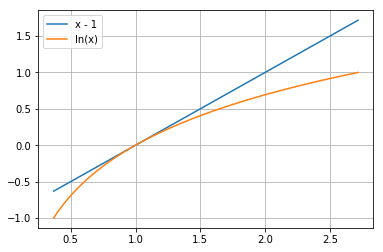

In [42]:
x = np.linspace(0.1, 3, 100)
plt.plot(x, x - 1, label='x - 1')
plt.plot(x, np.log(x), label='ln(x)')
plt.legend()
plt.grid()

Now, we use that inequality
$$
\begin{align*}
\sum_{x_i} p(x_i) log\frac{p(x_i)}{q(x_i)} &= - \sum_{x_i} p(x_i) log\frac{q(x_i)}{p(x_i)} \\
&\geq - \sum_{x_i} p(x_i) \bigg(\frac{q(x_i)}{p(x_i)} - 1\bigg) \\
&= - \sum_{x_i} q(x_i) + \sum_{x_i} p(x_i) \\
&= 0 \\
\therefore KL(p||q) &\geq 0
\end{align*}
$$


The inequality yields from the difference between
$$f(p, q) = log\frac{q(x_i)}{p(x_i)} \ and \  g(p, q) = \frac{q(x_i)}{p(x_i)} - 1$$

### Intuition behind the inequality
When $q$ and $p$ are the same distribution, the difference between these two terms is zero, and the KL divergence is also zero. In general, the KL divergence is proportional to this difference. As you can see in the plot, the further away we are from $\frac{q(x_i)}{p(x_i)} = 1$, the biggest the diference between $f$ (the log function) and $g$ (the line).

So, minimizing the KL divergence directly minimizes the difference between $f$ and $g$, which in turn minimizes how further away $q$ is from being equal to $p$. 

The plot also expains why $KL(p||q)$ differs from $KL(q||p)$. Namely, the difference $d(p, q) = f(p, q) - g(p, q)$ doesn't fulfill d(p, q) != d(q, p). This happens because [textiño]

We can visualize how KL(p, q)

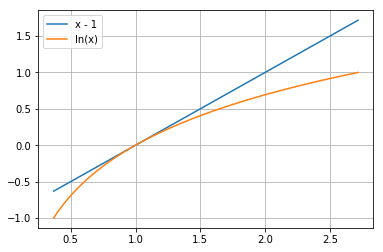

In [43]:
x = np.linspace(1/np.e, np.e, 100)
plt.plot(x, x - 1, label='x - 1')
plt.plot(x, np.log(x), label='ln(x)')
plt.legend()
plt.grid()

Now say how minimizing the cross entropy is the same as minimizing the KL divergence.
Also, is there any other function that makes the KL(p||q) = KL(q||p) we need to change the orange graph above.

# Explanation 2
#### Source
Almost all the ideas in explanation 2 are from http://colah.github.io/posts/2015-09-Visual-Information/. It's a very very good article. 

#### Channel
Let's say there is a channel we use to send messages. Say we are building a system for a fancy coffee shop where the coffee sizes are "mini, medium, big, XL." As we are in a very consumist city, the XL coffee gets asked more times and the medium less times. Say we encode each coffee size into a binary code. Then, medium could correspond to 01, big to 110 and so on. 

As in this channel we don't want to lose efficency by saying when a code starts and ends, we want a set of codes that are uniquely decodable. For instance, if we have the codes {01, 10} and we receive this string in the channel 101001 we can easily say that the string corresponds to first two instances of the second code and then one instance of the first code. However, if we have the codes {0, 01, 1} and we have the string 01, we don't know if it corresponds to the code 01 or the codes 0 and 1.

#### Prefix property
We can limit the codes we select in the following way: we don't select codes that have as prefix a code that we already have in our bag of codes. For instance, if we have the code 01, then we can't use 010, 011 or any other code starting with 01. [1] 

This requirement limits us to only having so many short codes, for if we have 0 and 1, we can't have more codes. For instance, if we need to have at least three codes, then we only can have one code of one bit. Each code removes a certain amount of codes proportional to how short it is: the shorter the code, the more codes it reduces.

Let's say we have a budget of 1. Then if we use no codes at all, we consume all the budget at once. [2] Now, if we use the code 0, we consume half of the budget (because we no longer can use half of the codes.) Instead, if we use the code 01, we consume a quarter of the budget. In general, the amount we remove is $ C(x) = \dfrac{1}{2^{L(x)}} $ with L(x) the length of the code x.

#### Using the total cost
It makes intuitive sense to use the total budget of 1. If we don't use it, we are having codes that can be shorter. For instance, the bag of codes {00, 01, 10} uses the 75% of the budget, because each code removes a quarter from the budget. In this case, the bag of codes {00, 01, 1} is better. 

### Two codes
Now, we want to give the smaller codes to the messages we say the most ("XL") and longer codes to the messages we say the least ("medium.") But how small?

An intuitive answer is using the budget in proportion to the probability of a message happening. Let's explore this opinion thinking only about a channel to convey two events: a and b.

Say event a happens with probability $p(a)$ and b with $p(b).$ The codes we can use to convey this events have variable length. So, if I have to pay for the length of the string I send through the channel, the average payment for sending one code is

$$\sum_{m\in\{a, b\}}p(m)L(m)$$ which is equivalent to the sum of the areas of the rectanglesin the drawing below.

Figure 1

So, the overarching question resides in how long are the messages $L(a)$ and $L(b).$ We said that a reasonable approach is to define the cost proportionally to the probabilities. So the probabilities define the cost. And also we know that the cost defines the length. 

To show that this definition for the length is optimal, let's show that it doesn't make sense to change the lengths if they are proportional to the probabilities and it does make sense to change them if they aren't. (We will use base $e$ in this proof instead of base $2.$)

#### Lengths proportional to probabilities
Let's call S(a) to the contribution of p(a) to the average payment and S(b) to that of p(b) (see drawing.) By seeing the rectangles we note the following two derivatives.
$$
\frac{dS(x)}{dL(x)} = p(x)
$$

Now, recall that we have a limited budget of 1. The cost for a given length of a code is given by 
$$C(x) = \frac{1}{e^{L(x)}} = e^{-L(x)} $$
Also, the definition of the cost proportional to the probabilities means that 
$$
C(x) = p(x) \\
\frac{dC(x)}{dL(x)} = -e^{-L(x)} = -C(x) = -p(x)
$$
This means that if we slightly increase $L(x)$, $C(x)$ decreases proportionally to $p(x)dL(x)$ (with $dL(x)$ being the infinitesimal operator.)

Now,
$$
\begin{align*}
C(x) &= \frac{1}{e^{L(x)}} \\
e^{L(x)} &= \frac{1}{C(X)} \\
L(x) &= log\frac{1}{C(X)} \\
\frac{dL(x)}{dC(x)} &= -\frac{1}{C(x)} = -\frac{1}{p(x)} \\
\end{align*}
$$

Now,
$$\frac{dS(x)}{dC(x)} = \frac{dS(x)}{dL(x)} \cdot \frac{dL(x)}{dC(x)} = p(x) \cdot -\frac{1}{p(x)} = -1 $$

Interestingly, this applies both to $a$ and $b$ so if we spend $k$ more of our budget in $L(a)$ (the code for $a$) $S(a)$ (the contribution to the average payment for $a$) will get reduced by $k.$

The thing is that if we spend $k$ more on $a,$ then we have to spend $k$ less on $b.$ And now $S(b)$ will get increased by $k.$ In my mind, this seems as a local optima. 

#### Length not proportional to the probabilities
Let's say we are a little bit off in our assignments for C(x). Namely,
$$
C(a) = P(a) + \epsilon \\
C(b) = P(b) - \epsilon \\
$$

Again, we are interested in $\frac{dS(x)}{dC(x)}.$ We know that $\frac{dS(x)}{dL(x)}$ remains the same. But now
$$
\begin{align*}
\frac{dL(a)}{dC(a)} &= -\frac{1}{C(a)} = -\frac{1}{p(a) + \epsilon} \\
\frac{dL(b)}{dC(b)} &= -\frac{1}{C(b)} = -\frac{1}{p(b) - \epsilon} \\
\end{align*}
$$
Thus, 
$$
\begin{align*}
\frac{dS(a)}{dC(a)} &= -\frac{p(a)}{p(a) + \epsilon} < 1 \\
\frac{dS(b)}{dC(b)} &= -\frac{p(b)}{p(b) - \epsilon} > 1 \\
\end{align*}
$$
Now, if we spend $k$ of our budget on $p(b),$ the average contribution will get reduced by $l_1 = k\frac{p(b)}{p(b) - \epsilon}.$ We have the requirement that $0 < k < \epsilon.$ Now we need to borrow this cost from $a$. For $a$ this means that the average contribution will increase by $l_2 = k\frac{p(a)}{p(a) + \epsilon}.$ We can see that $l_2 < l_1,$ this implies that the average payment will get reduced more than what it increases! And this will happen until $\epsilon = 0.$ Thus, we just showed that for two codes, the optimal budget for each code is to make them proportional to their probability of happening.

#### More than two codes
A similar reasoning applies to a bag that has more than two codes. We start with eqach code with the allocated budget equal to its probability of happening. If some code has a bigget budget than its probability of happening, it means there is at least one other code that has a smaller budget. As we showed before, it makes sense to remove budget from the former code and give it to the latter.

### Entropy
To recap, we showed that the optimal length $L(\cdot)$ of a message $x$ is $L(x) = log \frac{1}{p(x)}.$ This is optimal in the sense that it assures us that the average length of the code we send is the smallest possible. We call entropy to this optimal encoding. [3]

$$H(p) = \sum_x p(x)L(x) = \sum_x p(x) log \frac{1}{p(x)}$$

Recall that this measure is the same we depicted in Figure 1. 

### Cross entropy
Now, if we use the optimal encoding for a probability distribution $p(\cdot)$ but how often we send each type of message is determined by $q(\cdot)$, we have the cross entropy.
$$H_q(p) = \sum_x q(x)L(x) = \sum_x q(x) log \frac{1}{p(x)}$$

### KL divergence
We can make sense of the cross entropy by looking at the difference between the cross entropy and the entropy

$$
\begin{align*}
D_q(p) &= H_p(q) - H(p) \\
&= \sum_x p(x) log \frac{1}{q(x)} - \sum_x p(x) log \frac{1}{p(x)} \\
&= \sum_x p(x) \Big( log \frac{1}{q(x)} - log \frac{1}{p(x)} \Big) \tab\tab\tab\tab\tab (1) \\
&= \sum_x p(x) log \frac{p(x)}{q(x)} \\
\end{align*}
$$

Notice (1). We are calculating the difference between the length of a message using the optimal encoding given by $p$ and the encoding given by $q.$ [4]

### Appendix A: reality model in our brain.
#### Learning or unlearning
Being surprised means that your expectations were different from what happened. In other words, your internal model of the reality failed in predicting something. And that's either learning or unlearning. Either your model of the world gets more accurate or it gets less accurate. 

This implies that you need to get surprised to learn. Interestingly, being surprised doesn't mean learning. You can start with a correct model of the world, and then someone tells us that the world behaves in a different way. You get surprised and unlearn at the same time.

If we model learning as getting nearer to the correct model of the world, then it seems easier to learn than to unlearn. That happens because if you are learning the correct model of the world, then the evidence will tell you that you are fine. Instead, if you pass from an accurate model to a less accurate one, you will notice that there are contradictions. That could imply the difficulty in progress to be backward and the ease to be forward.

#### Interesting
For something to be interesting, I think it requires surprises. How something can be interesting if you already knew it?

But if something is surprising it isn't necessary interesting. For instance, guess the next number in this series 1, 2, 3, 4, _.

The answer is 9. Yeah, that's surprising. But it isn't useful. You need to care about what you are modeling. And you probably don't care at all about the task category "arbitrary series from a random person." I think we care about a subset of all the possible tasks in the universe. It has been shown that if we care about every possible task, then even the best algorithm will perform just the same as by chance. So, we only care about task that are in a given subset.

In some sense, we want a neural net to follow its "interests," because that means it's being surprised (requirement for learning) and it's working on something it cares (the subset of the problems we mentioned early.) 

#### General problem solver
It's interesting how evolution came up with a pretty general problem solver (our brain) as the fittest indivuals. It seems as if the tasks of nature are better solved by an individual with general intelligence than a narrow one. The fact that we can do math with our brain is remarkable. That evolution made us general problem solver could be a (weak) proof that even for solving a subset of tasks it's better to use general than narrow intelligence. [5]

#### Summary
* reality differs from predictions <=> surprising
* (surprising and caring) <=> interesting
* learning requires surprises

#### Notes
[1] Although this property is enough, maybe we need less. For instance, if we have the bag of codes {0, 01} and we have the string 001, there is only one way of decoding this string. It turns out the bag of codes {0, 01} fulfills the suffix property (the same as the prefix property but backwards.) Now, I think that if a bag of codes doesn't fulfill the prefix nor the sufix property, then it isn't in uniquely decodable (eg, the string 010 made with this bag of codes {0, 01, 10} isn't uniquely decodable because it could be 0-10 or 01-0.) (I don't have a formal proof for this.)  

[2] This case is interesting; it means the same message is being conveyed at all times, so the length of the message is zero. (That happens because the listener always knows what's going to receive.)

[3] It's pretty interesting that the $log(\frac{1}{p(x)})$ appears both for an intuitive measure of information and for the optimal encoding through a channel.

[4] When I was trying to understand KL divergence, it surprised me how the definition of KL divergence managed to be always positive, for $log\frac{p(x)}{q(x)}$ is sometimes positive and sometimes negative. The answer to the puzzle is that even if for some codes $q$ has a smaller encoding than $p,$ taking into account all the codes $p$ has shorter codes. 

[5] However, it's clear that we have some specialization. For instance, we are very good dealing with 3D spaces (hence, intuitive visualization using geometry and memory techniques using pictures.) Also, how can we define how much we generalize? We don't have something to compare with.  